In [1]:
from __future__ import print_function
import mxnet as mx
import numpy as np
from mxnet import nd, autograd, gluon
from mxnet.gluon import nn
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [6]:

data_ctx = mx.cpu()
#model_ctx = mx.cpu()
model_ctx = mx.gpu(2)

num_inputs = 784
num_outputs = 10
batch_size = 64
N_train = 60000
N_test = 10000
def transform(data, label):
    return data.astype(np.float32)/255, label.astype(np.float32)

train_data = gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=True, transform=transform),
                                      N_train, shuffle=True)
test_data = gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=False, transform=transform),
                                     N_test, shuffle=False)
for i, (data, label) in enumerate(train_data):
    print(i)
a=label.asnumpy()
data=data.asnumpy()
trdata7=data[a==7]#[:10]
trdata8=data[a==8]#[:10]
for i, (data, label) in enumerate(test_data):
    print(i)
a=label.asnumpy()
data=data.asnumpy()
tedata7=data[a==7]
tedata8=data[a==8]
X_tr=np.concatenate([trdata7,trdata8],axis=0).reshape((-1,784))
X_tr=np.concatenate([X_tr,np.ones([X_tr.shape[0],1])],axis=1)
y_tr=np.concatenate([np.zeros(trdata7.shape[0]),np.zeros(trdata8.shape[0])+1])
X_te=np.concatenate([tedata7,tedata8],axis=0).reshape((-1,784))
X_te=np.concatenate([X_te,np.ones([X_te.shape[0],1])],axis=1)
y_te=np.concatenate([np.zeros(tedata7.shape[0]),np.zeros(tedata8.shape[0])+1])

0
0


In [41]:
X_tr.shape

(12116, 785)

In [7]:
print('Train 7:',len(trdata7),'Train 8:',len(trdata8),'Test 7:',len(tedata7),'Test 8:' , len(tedata8))


Train 7: 6265 Train 8: 5851 Test 7: 1028 Test 8: 974


# SVM

In [100]:
clf = SVC(gamma='auto',kernel='linear')
clf.fit(X_tr, y_tr) 
error_rate=np.count_nonzero(clf.predict(X_te)-y_te)/len(y_te)
print('error_rate:',error_rate)
#clf.predict(X_te)

error_rate: 0.01098901098901099


# SGD

In [43]:
sample=1
x=np.ones(785)
np.random.seed(1)
#(1/(1+np.exp(-np.dot(X_tr[sample,:],theta))-y_tr[sample]))
a=0.01
L=[]
np.random.seed(2)
SGD_trainloss=[]
SGD_trainacc=[]
SGD_testacc=[]
for i in range(40000):
    sample=np.random.randint(len(y_tr))
    g=X_tr[sample,:]*(1/(1+np.exp(-np.sum(X_tr[sample,:]*x)))-y_tr[sample])
    if i>10000:
        a=100/(100+np.sqrt(i)) 
    x=x-a*g;
    trloss=np.sum(np.log(1+np.exp(np.dot(X_tr,x.reshape(len(x),1)))))+np.sum(y_tr.reshape(len(y_tr),1)*np.dot(X_tr,x.reshape(len(x),1)))
    SGD_trainloss.append(trloss)
    if i%100==0:
        print(i)
        ypre=np.sum(X_tr*x,axis=1)>0
        trerror_rate=np.count_nonzero(ypre-y_tr)/len(y_tr)
        
        y_pre=np.sum(X_te*x,axis=1)>0
        teerror_rate=np.count_nonzero(y_pre-y_te)/len(y_te)
        teacc=1-teerror_rate
        
        SGD_trainacc.append(1-trerror_rate)
        L.append(teacc)
        print('train_acc:',1-trerror_rate,'test_acc:',teacc)
        print('error_rate:',teerror_rate)

0
train_acc: 0.4829151535160119 test_acc: 0.48651348651348647
error_rate: 0.5134865134865135
100
train_acc: 0.4829151535160119 test_acc: 0.48651348651348647
error_rate: 0.5134865134865135
200
train_acc: 0.4829151535160119 test_acc: 0.48651348651348647
error_rate: 0.5134865134865135
300
train_acc: 0.4829151535160119 test_acc: 0.48651348651348647
error_rate: 0.5134865134865135
400
train_acc: 0.6670518322878838 test_acc: 0.6803196803196803
error_rate: 0.3196803196803197
500
train_acc: 0.8238692637834268 test_acc: 0.8286713286713286
error_rate: 0.17132867132867133
600
train_acc: 0.8654671508748761 test_acc: 0.8701298701298701
error_rate: 0.12987012987012986
700
train_acc: 0.9030207989435457 test_acc: 0.8976023976023976
error_rate: 0.1023976023976024
800
train_acc: 0.9122647738527567 test_acc: 0.9070929070929071
error_rate: 0.09290709290709291
900
train_acc: 0.9189501485638825 test_acc: 0.9140859140859141
error_rate: 0.08591408591408592
1000
train_acc: 0.9211786068009244 test_acc: 0.9160839

8600
train_acc: 0.9720204688015847 test_acc: 0.9545454545454546
error_rate: 0.045454545454545456
8700
train_acc: 0.9721855397821063 test_acc: 0.9545454545454546
error_rate: 0.045454545454545456
8800
train_acc: 0.9725156817431495 test_acc: 0.9555444555444556
error_rate: 0.044455544455544456
8900
train_acc: 0.9711125784087158 test_acc: 0.9545454545454546
error_rate: 0.045454545454545456
9000
train_acc: 0.9729283591944536 test_acc: 0.9545454545454546
error_rate: 0.045454545454545456
9100
train_acc: 0.972763288213932 test_acc: 0.9555444555444556
error_rate: 0.044455544455544456
9200
train_acc: 0.9729283591944536 test_acc: 0.9555444555444556
error_rate: 0.044455544455544456
9300
train_acc: 0.9724331462528888 test_acc: 0.9555444555444556
error_rate: 0.044455544455544456
9400
train_acc: 0.9729283591944536 test_acc: 0.955044955044955
error_rate: 0.04495504495504495
9500
train_acc: 0.9738362495873225 test_acc: 0.9560439560439561
error_rate: 0.04395604395604396
9600
train_acc: 0.9739187850775833

17100
train_acc: 0.9909210960713106 test_acc: 0.98001998001998
error_rate: 0.01998001998001998
17200
train_acc: 0.9895179927368769 test_acc: 0.98001998001998
error_rate: 0.01998001998001998
17300
train_acc: 0.9914988445031363 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
17400
train_acc: 0.9913337735226148 test_acc: 0.982017982017982
error_rate: 0.017982017982017984
17500
train_acc: 0.9913337735226148 test_acc: 0.982017982017982
error_rate: 0.017982017982017984
17600
train_acc: 0.9913337735226148 test_acc: 0.982017982017982
error_rate: 0.017982017982017984
17700
train_acc: 0.9913337735226148 test_acc: 0.982017982017982
error_rate: 0.017982017982017984
17800
train_acc: 0.9715252558600198 test_acc: 0.9695304695304695
error_rate: 0.030469530469530468
17900
train_acc: 0.9892703862660944 test_acc: 0.9805194805194806
error_rate: 0.01948051948051948
18000
train_acc: 0.9912512380323539 test_acc: 0.9835164835164835
error_rate: 0.016483516483516484
18100
train_acc: 0.990425883129

25600
train_acc: 0.9862165731264444 test_acc: 0.978021978021978
error_rate: 0.02197802197802198
25700
train_acc: 0.9801089468471442 test_acc: 0.9755244755244755
error_rate: 0.024475524475524476
25800
train_acc: 0.9915813799933971 test_acc: 0.983016983016983
error_rate: 0.016983016983016984
25900
train_acc: 0.9919940574447013 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
26000
train_acc: 0.9919940574447013 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
26100
train_acc: 0.9712776493892373 test_acc: 0.9665334665334665
error_rate: 0.033466533466533464
26200
train_acc: 0.9905084186200066 test_acc: 0.982017982017982
error_rate: 0.017982017982017984
26300
train_acc: 0.9876196764608782 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
26400
train_acc: 0.9885275668537471 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
26500
train_acc: 0.9910861670518323 test_acc: 0.9835164835164835
error_rate: 0.016483516483516484
26600
train_acc: 0.9910036

34100
train_acc: 0.9932320897986134 test_acc: 0.9875124875124875
error_rate: 0.012487512487512488
34200
train_acc: 0.9893529217563553 test_acc: 0.9815184815184815
error_rate: 0.01848151848151848
34300
train_acc: 0.9876196764608782 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
34400
train_acc: 0.9867943215582701 test_acc: 0.982017982017982
error_rate: 0.017982017982017984
34500
train_acc: 0.9935622317596566 test_acc: 0.9865134865134865
error_rate: 0.013486513486513486
34600
train_acc: 0.9933146252888743 test_acc: 0.986013986013986
error_rate: 0.013986013986013986
34700
train_acc: 0.9934796962693958 test_acc: 0.986013986013986
error_rate: 0.013986013986013986
34800
train_acc: 0.9832452954770551 test_acc: 0.9785214785214785
error_rate: 0.02147852147852148
34900
train_acc: 0.992984483327831 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
35000
train_acc: 0.9879498184219214 test_acc: 0.98001998001998
error_rate: 0.01998001998001998
35100
train_acc: 0.9886101023

In [46]:
print(max(SGD_trainacc))
print(max(L))

0.9938098382304391
0.9885114885114885


In [37]:
print('Tmax=1000',max(L[:1000]),'Tmax=10000',max(L[:10000]))
print(max(L))


Tmax=1000 0.952047952047952 Tmax=10000 0.986013986013986
0.986013986013986


# RMSProp

In [9]:
x=np.ones(785)
np.random.seed(1)
a=0.01
rho=0.95
delta=1e-6
r=np.zeros(785)
L=[]
np.random.seed(2)
RMSProp_trainloss=[]
for i in range(4000):
    sample=np.random.randint(len(y_tr))
    g=X_tr[sample,:]*(1/(1+np.exp(-np.sum(X_tr[sample,:]*x)))-y_tr[sample])
    r=rho*r+(1-rho)*g*g
    x=x-a/np.sqrt(delta+r)*g;
    trloss=np.sum(np.log(1+np.exp(np.dot(X_tr,x.reshape(len(x),1)))))+np.sum(y_tr.reshape(len(y_tr),1)*np.dot(X_tr,x.reshape(len(x),1)))
    RMSProp_trainloss.append(trloss)

# Adam

In [10]:
x=np.ones(785)
np.random.seed(1)
a=0.01
beta1=0.9
beta2=0.999
eps=1e-8
m,v=np.zeros(785),np.zeros(785)
t=0
np.random.seed(2)
Adam_trainloss=[]
for i in range(4000):
    t=t+1
    sample=np.random.randint(len(y_tr))
    g=X_tr[sample,:]*(1/(1+np.exp(-np.sum(X_tr[sample,:]*x)))-y_tr[sample])
    m=beta1*m+(1-beta1)*g
    v=beta2*v+(1-beta2)*g*g
    mhat=m/(1-beta1**t)
    vhat=v/(1-beta2**t)
    x=x-a*mhat/(np.sqrt(vhat)+eps);
    trloss=np.sum(np.log(1+np.exp(np.dot(X_tr,x.reshape(len(x),1)))))+np.sum(y_tr.reshape(len(y_tr),1)*np.dot(X_tr,x.reshape(len(x),1)))
    Adam_trainloss.append(trloss)

# Lookahead + SGD

In [11]:
sample=1
x=np.ones(785)
phi=x
np.random.seed(2)
a=0.01
LAsgd_trainloss=[]
for k in range(1000):
    #phi=x
    for i in range(10):
        sample=np.random.randint(len(y_tr))
        g=X_tr[sample,:]*(1/(1+np.exp(-np.sum(X_tr[sample,:]*x)))-y_tr[sample])
        if i>10000:
            a=100/(100+np.sqrt(i)) 
        x=x-a*g;
    phi=phi+0.5*(x-phi)
    x=phi
    trloss=np.sum(np.log(1+np.exp(np.dot(X_tr,x.reshape(len(x),1)))))+np.sum(y_tr.reshape(len(y_tr),1)*np.dot(X_tr,x.reshape(len(x),1)))
    LAsgd_trainloss.append(trloss)

# Lookahead + RMSProp

In [17]:
x=np.ones(785)
np.random.seed(1)
a=0.01
rho=0.95
delta=1e-6
r=np.zeros(785)
L=[]
np.random.seed(2)

LARMSProp_trainloss=[]
for k in range(1000):
    for i in range(10):
        sample=np.random.randint(len(y_tr))
        g=X_tr[sample,:]*(1/(1+np.exp(-np.sum(X_tr[sample,:]*x)))-y_tr[sample])
        r=rho*r+(1-rho)*g*g
        x=x-a/np.sqrt(delta+r)*g;
    phi=phi+0.5*(x-phi)
    x=phi
    trloss=np.sum(np.log(1+np.exp(np.dot(X_tr,x.reshape(len(x),1)))))+np.sum(y_tr.reshape(len(y_tr),1)*np.dot(X_tr,x.reshape(len(x),1)))
    LARMSProp_trainloss.append(trloss)

# Lookahead + Adam

In [18]:
x=np.ones(785)
np.random.seed(1)
a=0.01
beta1=0.9
beta2=0.999
eps=1e-8
m,v=np.zeros(785),np.zeros(785)
t=0
np.random.seed(2)

LAAdam_trainloss=[]
for k in range(2000):
    for i in range(10):
        t=t+1
        sample=np.random.randint(len(y_tr))
        g=X_tr[sample,:]*(1/(1+np.exp(-np.sum(X_tr[sample,:]*x)))-y_tr[sample])
        m=beta1*m+(1-beta1)*g
        v=beta2*v+(1-beta2)*g*g
        mhat=m/(1-beta1**t)
        vhat=v/(1-beta2**t)
        x=x-a*mhat/(np.sqrt(vhat)+eps)
    phi=phi+0.5*(x-phi)
    x=phi
    trloss=np.sum(np.log(1+np.exp(np.dot(X_tr,x.reshape(len(x),1)))))+np.sum(y_tr.reshape(len(y_tr),1)*np.dot(X_tr,x.reshape(len(x),1)))
    LAAdam_trainloss.append(trloss)
    if k%1==0:
        print(k)
        ypre=np.sum(X_tr*x,axis=1)>0
        trerror_rate=np.count_nonzero(ypre-y_tr)/len(y_tr)
        
        y_pre=np.sum(X_te*x,axis=1)>0
        teerror_rate=np.count_nonzero(y_pre-y_te)/len(y_te)
        teacc=1-teerror_rate
        L.append(teacc)
        print('train_acc:',1-trerror_rate,'test_acc:',teacc)
        print('error_rate:',teerror_rate)

0
train_acc: 0.4829151535160119 test_acc: 0.48651348651348647
error_rate: 0.5134865134865135
1
train_acc: 0.4829151535160119 test_acc: 0.48651348651348647
error_rate: 0.5134865134865135
2
train_acc: 0.4829151535160119 test_acc: 0.48651348651348647
error_rate: 0.5134865134865135
3
train_acc: 0.4829151535160119 test_acc: 0.48651348651348647
error_rate: 0.5134865134865135
4
train_acc: 0.4829151535160119 test_acc: 0.48651348651348647
error_rate: 0.5134865134865135
5
train_acc: 0.4829151535160119 test_acc: 0.48651348651348647
error_rate: 0.5134865134865135
6
train_acc: 0.4829151535160119 test_acc: 0.48651348651348647
error_rate: 0.5134865134865135
7
train_acc: 0.4829151535160119 test_acc: 0.48651348651348647
error_rate: 0.5134865134865135
8
train_acc: 0.4829151535160119 test_acc: 0.48651348651348647
error_rate: 0.5134865134865135
9
train_acc: 0.4829151535160119 test_acc: 0.48651348651348647
error_rate: 0.5134865134865135
10
train_acc: 0.4829151535160119 test_acc: 0.48651348651348647
error_r

train_acc: 0.9838230439088809 test_acc: 0.9735264735264735
error_rate: 0.026473526473526472
89
train_acc: 0.9838230439088809 test_acc: 0.9735264735264735
error_rate: 0.026473526473526472
90
train_acc: 0.9849785407725322 test_acc: 0.9735264735264735
error_rate: 0.026473526473526472
91
train_acc: 0.9848960052822714 test_acc: 0.973026973026973
error_rate: 0.026973026973026972
92
train_acc: 0.9849785407725322 test_acc: 0.9735264735264735
error_rate: 0.026473526473526472
93
train_acc: 0.985061076262793 test_acc: 0.9735264735264735
error_rate: 0.026473526473526472
94
train_acc: 0.985061076262793 test_acc: 0.9735264735264735
error_rate: 0.026473526473526472
95
train_acc: 0.9846483988114889 test_acc: 0.974025974025974
error_rate: 0.025974025974025976
96
train_acc: 0.9838230439088809 test_acc: 0.975024975024975
error_rate: 0.024975024975024976
97
train_acc: 0.9840706503796632 test_acc: 0.9745254745254746
error_rate: 0.025474525474525476
98
train_acc: 0.9839055793991416 test_acc: 0.9745254745254

train_acc: 0.9845658633212281 test_acc: 0.975024975024975
error_rate: 0.024975024975024976
177
train_acc: 0.9847309343017497 test_acc: 0.975024975024975
error_rate: 0.024975024975024976
178
train_acc: 0.9852261472433146 test_acc: 0.9760239760239761
error_rate: 0.023976023976023976
179
train_acc: 0.9869593925387917 test_acc: 0.9755244755244755
error_rate: 0.024475524475524476
180
train_acc: 0.9872069990095741 test_acc: 0.977022977022977
error_rate: 0.022977022977022976
181
train_acc: 0.9872069990095741 test_acc: 0.977022977022977
error_rate: 0.022977022977022976
182
train_acc: 0.9872069990095741 test_acc: 0.977022977022977
error_rate: 0.022977022977022976
183
train_acc: 0.9872069990095741 test_acc: 0.977022977022977
error_rate: 0.022977022977022976
184
train_acc: 0.9871244635193133 test_acc: 0.977022977022977
error_rate: 0.022977022977022976
185
train_acc: 0.9872069990095741 test_acc: 0.977022977022977
error_rate: 0.022977022977022976
186
train_acc: 0.9871244635193133 test_acc: 0.975524

train_acc: 0.9891878507758336 test_acc: 0.98001998001998
error_rate: 0.01998001998001998
265
train_acc: 0.9893529217563553 test_acc: 0.9805194805194806
error_rate: 0.01948051948051948
266
train_acc: 0.9893529217563553 test_acc: 0.9805194805194806
error_rate: 0.01948051948051948
267
train_acc: 0.9893529217563553 test_acc: 0.9805194805194806
error_rate: 0.01948051948051948
268
train_acc: 0.9893529217563553 test_acc: 0.9805194805194806
error_rate: 0.01948051948051948
269
train_acc: 0.9892703862660944 test_acc: 0.98001998001998
error_rate: 0.01998001998001998
270
train_acc: 0.9891878507758336 test_acc: 0.98001998001998
error_rate: 0.01998001998001998
271
train_acc: 0.9891053152855728 test_acc: 0.98001998001998
error_rate: 0.01998001998001998
272
train_acc: 0.9891053152855728 test_acc: 0.98001998001998
error_rate: 0.01998001998001998
273
train_acc: 0.989022779795312 test_acc: 0.98001998001998
error_rate: 0.01998001998001998
274
train_acc: 0.9889402443050511 test_acc: 0.9805194805194806
erro

train_acc: 0.9858864311654011 test_acc: 0.98001998001998
error_rate: 0.01998001998001998
354
train_acc: 0.9794486629250577 test_acc: 0.9735264735264735
error_rate: 0.026473526473526472
355
train_acc: 0.9839881148894024 test_acc: 0.98001998001998
error_rate: 0.01998001998001998
356
train_acc: 0.9855562892043579 test_acc: 0.98001998001998
error_rate: 0.01998001998001998
357
train_acc: 0.9862991086167052 test_acc: 0.98001998001998
error_rate: 0.01998001998001998
358
train_acc: 0.9886926378342688 test_acc: 0.982017982017982
error_rate: 0.017982017982017984
359
train_acc: 0.990343347639485 test_acc: 0.982017982017982
error_rate: 0.017982017982017984
360
train_acc: 0.9905909541102674 test_acc: 0.9815184815184815
error_rate: 0.01848151848151848
361
train_acc: 0.9905084186200066 test_acc: 0.9815184815184815
error_rate: 0.01848151848151848
362
train_acc: 0.9907560250907891 test_acc: 0.981018981018981
error_rate: 0.01898101898101898
363
train_acc: 0.9904258831297458 test_acc: 0.9815184815184815


train_acc: 0.9889402443050511 test_acc: 0.9815184815184815
error_rate: 0.01848151848151848
442
train_acc: 0.9889402443050511 test_acc: 0.9815184815184815
error_rate: 0.01848151848151848
443
train_acc: 0.9889402443050511 test_acc: 0.9815184815184815
error_rate: 0.01848151848151848
444
train_acc: 0.9902608121492241 test_acc: 0.9815184815184815
error_rate: 0.01848151848151848
445
train_acc: 0.9919940574447013 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
446
train_acc: 0.9919115219544404 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
447
train_acc: 0.9919115219544404 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
448
train_acc: 0.9918289864641796 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
449
train_acc: 0.9919115219544404 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
450
train_acc: 0.9919940574447013 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
451
train_acc: 0.9923241994057445 test_acc: 0.985514

train_acc: 0.9922416639154836 test_acc: 0.986013986013986
error_rate: 0.013986013986013986
529
train_acc: 0.9925718058765269 test_acc: 0.987012987012987
error_rate: 0.012987012987012988
530
train_acc: 0.9920765929349621 test_acc: 0.9835164835164835
error_rate: 0.016483516483516484
531
train_acc: 0.9921591284252228 test_acc: 0.983016983016983
error_rate: 0.016983016983016984
532
train_acc: 0.9921591284252228 test_acc: 0.983016983016983
error_rate: 0.016983016983016984
533
train_acc: 0.9922416639154836 test_acc: 0.983016983016983
error_rate: 0.016983016983016984
534
train_acc: 0.9922416639154836 test_acc: 0.9835164835164835
error_rate: 0.016483516483516484
535
train_acc: 0.9910861670518323 test_acc: 0.98001998001998
error_rate: 0.01998001998001998
536
train_acc: 0.982419940574447 test_acc: 0.9760239760239761
error_rate: 0.023976023976023976
537
train_acc: 0.9766424562561902 test_acc: 0.9715284715284715
error_rate: 0.028471528471528472
538
train_acc: 0.9750742819412347 test_acc: 0.9705294

train_acc: 0.9599702872235061 test_acc: 0.959040959040959
error_rate: 0.04095904095904096
616
train_acc: 0.9624463519313304 test_acc: 0.9595404595404595
error_rate: 0.040459540459540456
617
train_acc: 0.9694618686034995 test_acc: 0.965034965034965
error_rate: 0.03496503496503497
618
train_acc: 0.971442720369759 test_acc: 0.967032967032967
error_rate: 0.03296703296703297
619
train_acc: 0.9858038956751403 test_acc: 0.9785214785214785
error_rate: 0.02147852147852148
620
train_acc: 0.9879498184219214 test_acc: 0.9805194805194806
error_rate: 0.01948051948051948
621
train_acc: 0.9893529217563553 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
622
train_acc: 0.9896830637173984 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
623
train_acc: 0.9899306701881809 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
624
train_acc: 0.9896830637173984 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
625
train_acc: 0.9899306701881809 test_acc: 0.9835164

train_acc: 0.9907560250907891 test_acc: 0.982017982017982
error_rate: 0.017982017982017984
703
train_acc: 0.9912512380323539 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
704
train_acc: 0.9915813799933971 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
705
train_acc: 0.9915813799933971 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
706
train_acc: 0.9915813799933971 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
707
train_acc: 0.9915813799933971 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
708
train_acc: 0.9915813799933971 test_acc: 0.983016983016983
error_rate: 0.016983016983016984
709
train_acc: 0.9914988445031363 test_acc: 0.983016983016983
error_rate: 0.016983016983016984
710
train_acc: 0.9914163090128756 test_acc: 0.9835164835164835
error_rate: 0.016483516483516484
711
train_acc: 0.9914988445031363 test_acc: 0.983016983016983
error_rate: 0.016983016983016984
712
train_acc: 0.9914163090128756 test_acc: 0.98

train_acc: 0.9899306701881809 test_acc: 0.986013986013986
error_rate: 0.013986013986013986
790
train_acc: 0.9900132056784418 test_acc: 0.986013986013986
error_rate: 0.013986013986013986
791
train_acc: 0.9900132056784418 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
792
train_acc: 0.9900957411687026 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
793
train_acc: 0.9900132056784418 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
794
train_acc: 0.9900957411687026 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
795
train_acc: 0.9895179927368769 test_acc: 0.988011988011988
error_rate: 0.011988011988011988
796
train_acc: 0.9886101023440079 test_acc: 0.9875124875124875
error_rate: 0.012487512487512488
797
train_acc: 0.9883624958732254 test_acc: 0.987012987012987
error_rate: 0.012987012987012988
798
train_acc: 0.9883624958732254 test_acc: 0.987012987012987
error_rate: 0.012987012987012988
799
train_acc: 0.9883624958732254 test_acc: 0.987

train_acc: 0.9926543413667878 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
877
train_acc: 0.9876196764608782 test_acc: 0.984015984015984
error_rate: 0.015984015984015984
878
train_acc: 0.9922416639154836 test_acc: 0.986013986013986
error_rate: 0.013986013986013986
879
train_acc: 0.9920765929349621 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
880
train_acc: 0.9921591284252228 test_acc: 0.986013986013986
error_rate: 0.013986013986013986
881
train_acc: 0.990343347639485 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
882
train_acc: 0.9898481346979201 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
883
train_acc: 0.9897655992076593 test_acc: 0.984015984015984
error_rate: 0.015984015984015984
884
train_acc: 0.9896005282271376 test_acc: 0.984015984015984
error_rate: 0.015984015984015984
885
train_acc: 0.9896830637173984 test_acc: 0.984015984015984
error_rate: 0.015984015984015984
886
train_acc: 0.9896830637173984 test_acc: 0.984015

train_acc: 0.9924067348960053 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
964
train_acc: 0.9925718058765269 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
965
train_acc: 0.9925718058765269 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
966
train_acc: 0.9925718058765269 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
967
train_acc: 0.9925718058765269 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
968
train_acc: 0.9925718058765269 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
969
train_acc: 0.9925718058765269 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
970
train_acc: 0.9925718058765269 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
971
train_acc: 0.9925718058765269 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
972
train_acc: 0.9925718058765269 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
973
train_acc: 0.9924067348960053 test_acc: 0.

train_acc: 0.9897655992076593 test_acc: 0.984015984015984
error_rate: 0.015984015984015984
1051
train_acc: 0.9925718058765269 test_acc: 0.986013986013986
error_rate: 0.013986013986013986
1052
train_acc: 0.9897655992076593 test_acc: 0.982017982017982
error_rate: 0.017982017982017984
1053
train_acc: 0.9886926378342688 test_acc: 0.9805194805194806
error_rate: 0.01948051948051948
1054
train_acc: 0.9867943215582701 test_acc: 0.98001998001998
error_rate: 0.01998001998001998
1055
train_acc: 0.9853086827335754 test_acc: 0.9785214785214785
error_rate: 0.02147852147852148
1056
train_acc: 0.9851436117530538 test_acc: 0.978021978021978
error_rate: 0.02197802197802198
1057
train_acc: 0.9851436117530538 test_acc: 0.9775224775224776
error_rate: 0.022477522477522476
1058
train_acc: 0.9895179927368769 test_acc: 0.983016983016983
error_rate: 0.016983016983016984
1059
train_acc: 0.9915813799933971 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1060
train_acc: 0.9914988445031363 test_acc: 0

train_acc: 0.9933146252888743 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
1138
train_acc: 0.9933146252888743 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
1139
train_acc: 0.9933146252888743 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
1140
train_acc: 0.9933146252888743 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
1141
train_acc: 0.9933146252888743 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1142
train_acc: 0.9932320897986134 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1143
train_acc: 0.9932320897986134 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1144
train_acc: 0.9933146252888743 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
1145
train_acc: 0.993397160779135 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
1146
train_acc: 0.9934796962693958 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
1147
train_acc: 0.9934796962693958 test_acc

train_acc: 0.9853086827335754 test_acc: 0.9815184815184815
error_rate: 0.01848151848151848
1225
train_acc: 0.989022779795312 test_acc: 0.983016983016983
error_rate: 0.016983016983016984
1226
train_acc: 0.9919115219544404 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1227
train_acc: 0.9926543413667878 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
1228
train_acc: 0.9926543413667878 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1229
train_acc: 0.9924067348960053 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1230
train_acc: 0.9924067348960053 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
1231
train_acc: 0.9924067348960053 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
1232
train_acc: 0.9924892703862661 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
1233
train_acc: 0.9924067348960053 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
1234
train_acc: 0.9924067348960053 test_acc

train_acc: 0.9930670188180918 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
1311
train_acc: 0.9929019478375701 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
1312
train_acc: 0.9932320897986134 test_acc: 0.984015984015984
error_rate: 0.015984015984015984
1313
train_acc: 0.9933146252888743 test_acc: 0.9835164835164835
error_rate: 0.016483516483516484
1314
train_acc: 0.9936447672499175 test_acc: 0.9835164835164835
error_rate: 0.016483516483516484
1315
train_acc: 0.9922416639154836 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
1316
train_acc: 0.9915813799933971 test_acc: 0.981018981018981
error_rate: 0.01898101898101898
1317
train_acc: 0.9914988445031363 test_acc: 0.981018981018981
error_rate: 0.01898101898101898
1318
train_acc: 0.9914988445031363 test_acc: 0.981018981018981
error_rate: 0.01898101898101898
1319
train_acc: 0.9914163090128756 test_acc: 0.981018981018981
error_rate: 0.01898101898101898
1320
train_acc: 0.9914163090128756 test_acc:

train_acc: 0.9930670188180918 test_acc: 0.9815184815184815
error_rate: 0.01848151848151848
1399
train_acc: 0.9930670188180918 test_acc: 0.9815184815184815
error_rate: 0.01848151848151848
1400
train_acc: 0.9934796962693958 test_acc: 0.9815184815184815
error_rate: 0.01848151848151848
1401
train_acc: 0.9935622317596566 test_acc: 0.983016983016983
error_rate: 0.016983016983016984
1402
train_acc: 0.992984483327831 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
1403
train_acc: 0.9926543413667878 test_acc: 0.982017982017982
error_rate: 0.017982017982017984
1404
train_acc: 0.9924892703862661 test_acc: 0.9805194805194806
error_rate: 0.01948051948051948
1405
train_acc: 0.9915813799933971 test_acc: 0.9805194805194806
error_rate: 0.01948051948051948
1406
train_acc: 0.9928194123473093 test_acc: 0.984015984015984
error_rate: 0.015984015984015984
1407
train_acc: 0.9930670188180918 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
1408
train_acc: 0.9931495543083526 test_acc: 

train_acc: 0.9902608121492241 test_acc: 0.981018981018981
error_rate: 0.01898101898101898
1485
train_acc: 0.9904258831297458 test_acc: 0.9815184815184815
error_rate: 0.01848151848151848
1486
train_acc: 0.9905084186200066 test_acc: 0.9815184815184815
error_rate: 0.01848151848151848
1487
train_acc: 0.9905084186200066 test_acc: 0.9815184815184815
error_rate: 0.01848151848151848
1488
train_acc: 0.9904258831297458 test_acc: 0.9815184815184815
error_rate: 0.01848151848151848
1489
train_acc: 0.9912512380323539 test_acc: 0.982017982017982
error_rate: 0.017982017982017984
1490
train_acc: 0.9914163090128756 test_acc: 0.982017982017982
error_rate: 0.017982017982017984
1491
train_acc: 0.9914988445031363 test_acc: 0.983016983016983
error_rate: 0.016983016983016984
1492
train_acc: 0.9914988445031363 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
1493
train_acc: 0.9914988445031363 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
1494
train_acc: 0.9915813799933971 test_acc:

train_acc: 0.9933146252888743 test_acc: 0.986013986013986
error_rate: 0.013986013986013986
1571
train_acc: 0.9937273027401783 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1572
train_acc: 0.9937273027401783 test_acc: 0.9835164835164835
error_rate: 0.016483516483516484
1573
train_acc: 0.9931495543083526 test_acc: 0.983016983016983
error_rate: 0.016983016983016984
1574
train_acc: 0.9930670188180918 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
1575
train_acc: 0.9931495543083526 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
1576
train_acc: 0.9930670188180918 test_acc: 0.9825174825174825
error_rate: 0.017482517482517484
1577
train_acc: 0.9934796962693958 test_acc: 0.9835164835164835
error_rate: 0.016483516483516484
1578
train_acc: 0.9934796962693958 test_acc: 0.9835164835164835
error_rate: 0.016483516483516484
1579
train_acc: 0.9935622317596566 test_acc: 0.984015984015984
error_rate: 0.015984015984015984
1580
train_acc: 0.9934796962693958 tes

train_acc: 0.992984483327831 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
1659
train_acc: 0.9932320897986134 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
1660
train_acc: 0.9934796962693958 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
1661
train_acc: 0.9934796962693958 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
1662
train_acc: 0.9934796962693958 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
1663
train_acc: 0.9934796962693958 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
1664
train_acc: 0.9934796962693958 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
1665
train_acc: 0.9934796962693958 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
1666
train_acc: 0.993397160779135 test_acc: 0.985014985014985
error_rate: 0.014985014985014986
1667
train_acc: 0.9914163090128756 test_acc: 0.983016983016983
error_rate: 0.016983016983016984
1668
train_acc: 0.9901782766589634 test_a

train_acc: 0.993397160779135 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1746
train_acc: 0.9934796962693958 test_acc: 0.984015984015984
error_rate: 0.015984015984015984
1747
train_acc: 0.993397160779135 test_acc: 0.984015984015984
error_rate: 0.015984015984015984
1748
train_acc: 0.993397160779135 test_acc: 0.984015984015984
error_rate: 0.015984015984015984
1749
train_acc: 0.9935622317596566 test_acc: 0.984015984015984
error_rate: 0.015984015984015984
1750
train_acc: 0.9936447672499175 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1751
train_acc: 0.9937273027401783 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1752
train_acc: 0.9938923737206999 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1753
train_acc: 0.9940574447012215 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1754
train_acc: 0.9940574447012215 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1755
train_acc: 0.9938923737206999 test_ac

train_acc: 0.991663915483658 test_acc: 0.986013986013986
error_rate: 0.013986013986013986
1833
train_acc: 0.9918289864641796 test_acc: 0.986013986013986
error_rate: 0.013986013986013986
1834
train_acc: 0.9919115219544404 test_acc: 0.986013986013986
error_rate: 0.013986013986013986
1835
train_acc: 0.9919115219544404 test_acc: 0.986013986013986
error_rate: 0.013986013986013986
1836
train_acc: 0.9919115219544404 test_acc: 0.986013986013986
error_rate: 0.013986013986013986
1837
train_acc: 0.9920765929349621 test_acc: 0.986013986013986
error_rate: 0.013986013986013986
1838
train_acc: 0.9920765929349621 test_acc: 0.986013986013986
error_rate: 0.013986013986013986
1839
train_acc: 0.9920765929349621 test_acc: 0.986013986013986
error_rate: 0.013986013986013986
1840
train_acc: 0.9920765929349621 test_acc: 0.986013986013986
error_rate: 0.013986013986013986
1841
train_acc: 0.9925718058765269 test_acc: 0.9865134865134865
error_rate: 0.013486513486513486
1842
train_acc: 0.9940574447012215 test_acc: 

train_acc: 0.9924067348960053 test_acc: 0.9855144855144855
error_rate: 0.014485514485514486
1920
train_acc: 0.9910036315615715 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1921
train_acc: 0.9906734896005283 test_acc: 0.9835164835164835
error_rate: 0.016483516483516484
1922
train_acc: 0.9906734896005283 test_acc: 0.983016983016983
error_rate: 0.016983016983016984
1923
train_acc: 0.9906734896005283 test_acc: 0.983016983016983
error_rate: 0.016983016983016984
1924
train_acc: 0.9905909541102674 test_acc: 0.983016983016983
error_rate: 0.016983016983016984
1925
train_acc: 0.9908385605810498 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1926
train_acc: 0.9909210960713106 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1927
train_acc: 0.9909210960713106 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1928
train_acc: 0.9909210960713106 test_acc: 0.9845154845154845
error_rate: 0.015484515484515484
1929
train_acc: 0.9910036315615715 tes

In [37]:
np.linalg.matrix_rank(np.dot(X_tr.T,X_tr))

622

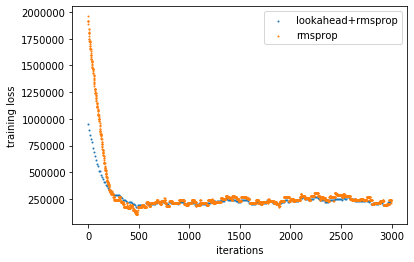

In [33]:
plt.scatter(np.arange(300)*10,LARMSProp_trainloss[:300],s=1)
plt.scatter(range(3000),RMSProp_trainloss[:3000],s=1)
plt.legend(['lookahead+rmsprop','rmsprop'])
plt.xlabel('iterations')
plt.ylabel('training loss')
plt.savefig('logi_mnist_rmsp.png')

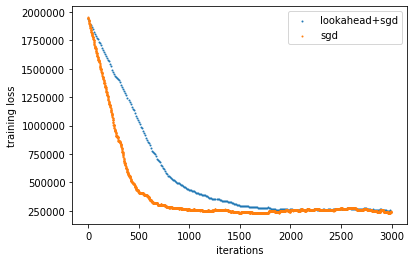

In [34]:
plt.scatter(np.arange(300)*10,LAsgd_trainloss[:300],s=1)
plt.scatter(range(3000),SGD_trainloss[:3000],s=1)
plt.legend(['lookahead+sgd','sgd'])
plt.xlabel('iterations')
plt.ylabel('training loss')
plt.savefig('logi_mnist_sgd.png')

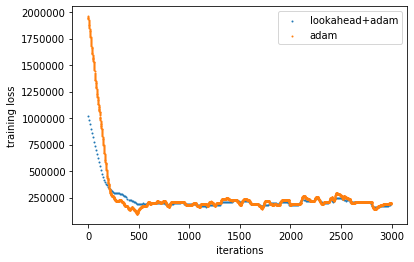

In [35]:
plt.scatter(np.arange(300)*10,LAAdam_trainloss[:300],s=1)
plt.scatter(range(3000),Adam_trainloss[:3000],s=1)
plt.legend(['lookahead+adam','adam'])
plt.xlabel('iterations')
plt.ylabel('training loss')
plt.savefig('logi_mnist_adam.png')